In [1]:
import pyaudio, wave

ModuleNotFoundError: ignored

## record (5 [sec])

In [0]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECOND = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                       channels=CHANNELS,
                       rate=RATE,
                       input=True,
                       frames_per_buffer=CHUNK)

print("* recording")

frames=[]
for i in range(0, int(RATE / CHUNK * RECORD_SECOND)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


## visualize recorded data

In [0]:
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

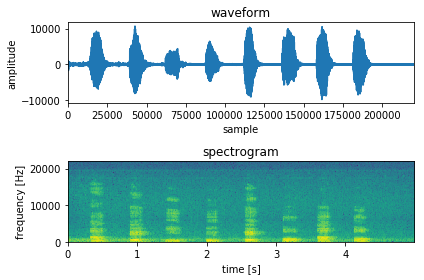

In [0]:
fs, speech_data = read(WAVE_OUTPUT_FILENAME)

plt.subplot(2,1,1)
plt.title("waveform")
plt.plot(speech_data)
plt.xlim(0, len(speech_data))
plt.xlabel("sample")
plt.ylabel("amplitude")

plt.subplot(2,1,2)
plt.title("spectrogram")
plt.specgram(speech_data, Fs=fs)
plt.xlabel("time [s]")
plt.ylabel("frequency [Hz]")

plt.tight_layout()
plt.show()

## play recorded data

In [0]:
wf = wave.open(WAVE_OUTPUT_FILENAME, 'rb')
p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                       channels=wf.getnchannels(),
                       rate=wf.getframerate(),
                       output=True)
data = wf.readframes(CHUNK)
while data != b'':
    stream.write(data)
    data = wf.readframes(CHUNK)
    
stream.stop_stream()
stream.close()

p.terminate()